In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df_train = pd.read_csv('../Downloads/Titanic train data.csv')

In [3]:
df_test = pd.read_csv('../Downloads/Titanic test data.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train['Sex'] = df_train [ 'Sex'].apply(lambda x :1 if x=='male' else 0 )

In [7]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

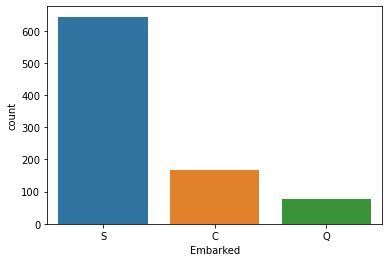

In [8]:
sb.countplot(df_train['Embarked'])

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

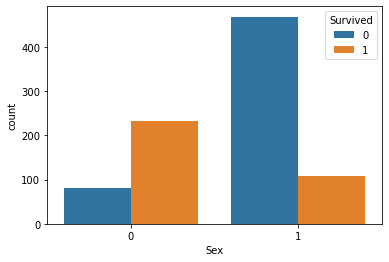

In [9]:
sb.countplot(df_train['Sex'] , hue = df_train['Survived'])

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

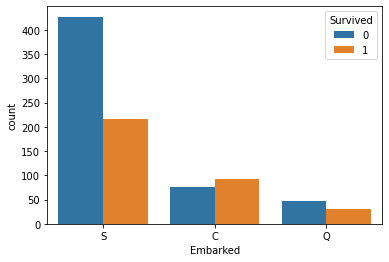

In [10]:
sb.countplot(df_train['Embarked'], hue = df_train['Survived'])

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
enc_onehot = OneHotEncoder(sparse=False)
enc_onehot.fit(df_train[['Embarked']])

OneHotEncoder(sparse=False)

In [13]:
enc_onehot = OneHotEncoder(sparse=False)
enc_onehot.fit(df_train[['Embarked']])

OneHotEncoder(sparse=False)

In [14]:
enc_onehot = OneHotEncoder(sparse=False)
enc_onehot.fit(df_train[['Embarked']])

OneHotEncoder(sparse=False)

In [15]:
enc_onehot.categories_[0]

array(['C', 'Q', 'S', nan], dtype=object)

In [16]:
embarked_enc = enc_onehot.transform(df_train[['Embarked']])

In [17]:
embarked_enc_df = pd.DataFrame(data=embarked_enc, columns=enc_onehot.categories_[0], dtype=int)
embarked_enc_df.head()

,C,Q,S,NaN
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [18]:
X = df_train[['Pclass','Age','SibSp','Parch','Fare','Sex']]
X = pd.concat([X,embarked_enc_df],axis=1)
y = df_train['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S,NaN
0,3,22.0,1,0,7.2500,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,1,0
4,3,35.0,0,0,8.0500,1,0,0,1,0


In [19]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Sex     891 non-null    int64  
 6   C       891 non-null    int32  
 7   Q       891 non-null    int32  
 8   S       891 non-null    int32  
 9   nan     891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train ,  y_test = train_test_split(X,y,test_size=0.25, random_state=11) 

In [22]:
X_train.shape

(668, 10)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [25]:
from sklearn.svm import SVC

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled =  scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\suhas\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
